# **PROBLEMA DE NEGOCIO**


---




## Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Existe otro insight que puedas proporcionar?

## Configuración del ambiente, importar librerias

In [1]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.7.6
------
Name: pandas
Version: 1.3.5
------
Name: matplotlib
Version: 3.5.3


In [1]:
import pandas as pd 
pd.options.mode.chained_assignment = None
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt  
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from sklearn.ensemble import RandomForestRegressor

## 2. Obtención, Tratamiento y Análisis Exploratorio (EDA)

- En este paso vamos a realizar limpieza de datos, manejar valores faltantes, análisis exploratorio, etc.

### Cargando las bases de datos


En este paso vamos a cargar dos bases de datos:

   - Base con informaciones de evolución del Covid19 de World Health Organization, guardaremos esto en df_covid.
   - Base con informaciones demográficas de Population United Nations, guardaremos en df_populationy filtraremos un año para análisis.

In [141]:
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
#df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
#df_population = df_population[df_population['Year'] == 2019]

display(df_covid.head())


,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


### Ver la cantidad de registros

In [106]:
df_covid.shape

(51120, 8)

In [107]:
df_covid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51120 entries, 0 to 51119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      51120 non-null  object 
 1   Country_code       50907 non-null  object 
 2   Country            51120 non-null  object 
 3   WHO_region         47286 non-null  object 
 4   New_cases          36698 non-null  float64
 5   Cumulative_cases   51120 non-null  int64  
 6   New_deaths         24249 non-null  float64
 7   Cumulative_deaths  51120 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [168]:
#Holy See = Santa Sede
# Filtra el DataFrame para obtener las filas correspondientes al país y código especificados
filtro_pais = df_covid_limpio.loc[df_covid_limpio['Country_code'] == 'VA']

filtro_pais



,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
20352,2020-01-05,VA,Holy See,0,0,0,0,0.0
20353,2020-01-12,VA,Holy See,0,0,0,0,0.0
20354,2020-01-19,VA,Holy See,0,0,0,0,0.0
20355,2020-01-26,VA,Holy See,0,0,0,0,0.0
20356,2020-02-02,VA,Holy See,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
20559,2023-12-24,VA,Holy See,0,26,0,0,0.0
20560,2023-12-31,VA,Holy See,0,26,0,0,0.0
20561,2024-01-07,VA,Holy See,0,26,0,0,0.0
20562,2024-01-14,VA,Holy See,0,26,0,0,0.0


## EDA Base Covid World Health Organization


### Eliminar todos los registros con nulos en la columna Country_code.

### Ver la cantidad de datos nulos por columnas

In [142]:
# Ver la cantidad de nulos por columna
df_covid.isnull().sum()

Date_reported            0
Country_code           213
Country                  0
WHO_region            3834
New_cases            14422
Cumulative_cases         0
New_deaths           26871
Cumulative_deaths        0
dtype: int64

In [143]:
# Eliminar registros nulos en la columna Country_code
df_covid_limpio = df_covid.dropna(subset=['Country_code'])

In [144]:
# cofirmamos que se eliminaron los datos nulos de la columna Country_code
df_covid_limpio.isnull().sum()

Date_reported            0
Country_code             0
Country                  0
WHO_region            3834
New_cases            14384
Cumulative_cases         0
New_deaths           26779
Cumulative_deaths        0
dtype: int64

### Mantener/Seleccionar en el dataframe las columnas mas importantes para este analisis, eliminar columnas irrelevantes

Eliminamos la columna WHO_region

In [145]:
selected_columns = ['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
df_covid_limpio = df_covid_limpio[selected_columns]
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,NaN,0,NaN,0


### Substituir todos los valores nulos con cero.

In [46]:
#df_covid = df_covid.fillna(0)

In [112]:
# Ver la cantidad de valores nulos
df_covid_limpio.isnull().sum()

Date_reported            0
Country_code             0
Country                  0
New_cases            14384
Cumulative_cases         0
New_deaths           26779
Cumulative_deaths        0
dtype: int64

In [146]:
# Aseguramos que la lista de columnas especificadas contengan ceros en lugar de valores nulos para garantizar 
# la integridad de los datos y evitar errores en análisis posteriores.
columns_to_replace_zero = ['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']

for column in columns_to_replace_zero:
    if df_covid_limpio[column].isnull().any():
        df_covid_limpio[column] = df_covid_limpio[column].fillna(0)


In [147]:
# verificamos que no tengamos valores nulos
df_covid_limpio.isnull().sum()

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
dtype: int64

In [148]:
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,0.0,0,0.0,0
1,2020-01-12,AF,Afghanistan,0.0,0,0.0,0
2,2020-01-19,AF,Afghanistan,0.0,0,0.0,0
3,2020-01-26,AF,Afghanistan,0.0,0,0.0,0
4,2020-02-02,AF,Afghanistan,0.0,0,0.0,0


In [149]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50907 entries, 0 to 51119
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50907 non-null  object 
 1   Country_code       50907 non-null  object 
 2   Country            50907 non-null  object 
 3   New_cases          50907 non-null  float64
 4   Cumulative_cases   50907 non-null  int64  
 5   New_deaths         50907 non-null  float64
 6   Cumulative_deaths  50907 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.1+ MB


### Cambiar el formato actual de la columna Date_reported para un formato de tipo datetime64[ns]
La columna Date_reported que es fecha esta tipo object

In [150]:
# Ver el tipo de datos de cada columna
df_covid_limpio.dtypes

Date_reported         object
Country_code          object
Country               object
New_cases            float64
Cumulative_cases       int64
New_deaths           float64
Cumulative_deaths      int64
dtype: object

In [151]:
#  Cambiar el formato de la columna Date_reported a datetime64[ns] que estaba como object
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])
df_covid_limpio.dtypes

Date_reported        datetime64[ns]
Country_code                 object
Country                      object
New_cases                   float64
Cumulative_cases              int64
New_deaths                  float64
Cumulative_deaths             int64
dtype: object

### Substituir el formato actual de las columnas New_cases, New_deaths para un formato de tipo int64.
Estan en formato float

In [152]:
# Cambiar el formato de las columnas New_cases y 'New_deaths a int64
df_covid_limpio[['New_cases', 'New_deaths']] = df_covid_limpio[['New_cases', 'New_deaths']].astype('int64')
df_covid_limpio.dtypes

Date_reported        datetime64[ns]
Country_code                 object
Country                      object
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
dtype: object

### Crear una nueva columna lethality_rate 

la operación de división da NaN cuando Cumulative_cases es 0.

se agrega una condición para manejar el caso donde Cumulative_cases es igual a cero. 
se establece esos valores en lethality_rate a cero

- lethality_rate casos de letalidad,  cuanta personas han fallecido del total de los casos

In [153]:
# Crear la columna lethality_rate con manejo de división por cero
df_covid_limpio['lethality_rate'] = np.where(df_covid_limpio['Cumulative_cases'] != 0, 
                                       (df_covid_limpio['Cumulative_deaths'] / df_covid_limpio['Cumulative_cases']) * 100, 
                                      0)
df_covid_limpio.head()



,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.0


In [21]:
#df_covid_limpio['lethality_rate'] = ((df_covid_limpio['Cumulative_deaths'])/(df_covid_limpio['Cumulative_cases'])) * 100
#df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,NaN
1,2020-01-12,AF,Afghanistan,0,0,0,0,NaN
2,2020-01-19,AF,Afghanistan,0,0,0,0,NaN
3,2020-01-26,AF,Afghanistan,0,0,0,0,NaN
4,2020-02-02,AF,Afghanistan,0,0,0,0,NaN


In [154]:
df_covid_limpio.dtypes

Date_reported        datetime64[ns]
Country_code                 object
Country                      object
New_cases                     int64
Cumulative_cases              int64
New_deaths                    int64
Cumulative_deaths             int64
lethality_rate              float64
dtype: object

In [155]:
df_covid_limpio.isnull().sum()

Date_reported        0
Country_code         0
Country              0
New_cases            0
Cumulative_cases     0
New_deaths           0
Cumulative_deaths    0
lethality_rate       0
dtype: int64

In [156]:
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.0


### Visualizar la distribución de los valores en la columna lethality_rate

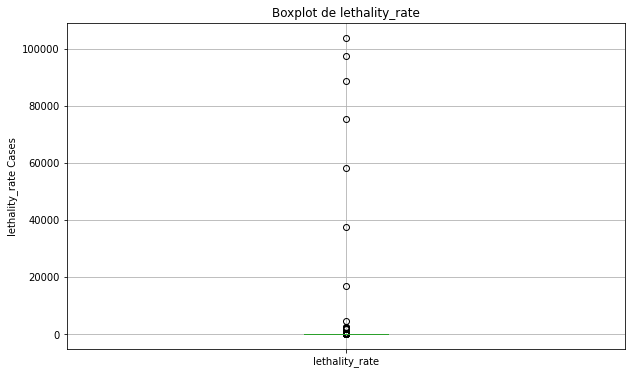

In [157]:
# Visualizar la distribución de los valores en la columna lethality_rate
# Crear una figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Crear el boxplot
df_covid_limpio.boxplot(['lethality_rate'])

# Añadir etiquetas y título
plt.ylabel('lethality_rate Cases')
plt.title('Boxplot de lethality_rate')

# Mostrar el gráfico
plt.show()

### Con el fin de eliminar outliers, nos quedaremos con los registros cuyo valor en la columna lethality_rate se encuentre entre los cuantiles 0 a 0.99

Hay valores negativos en New_cases y New_deaths y un lethality_rate de mas de 103000 %

In [158]:
df_covid_limpio.describe()



,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,5.090700e+04,5.090700e+04,50907.000000,5.090700e+04,50907.000000
mean,1.521004e+04,1.609910e+06,137.944919,1.884882e+04,11.436171
std,2.372431e+05,7.212517e+06,862.395523,7.831161e+04,874.194026
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00,0.000000
25%,0.000000e+00,2.774000e+03,0.000000,2.100000e+01,0.286946
50%,8.600000e+01,3.810200e+04,0.000000,4.110000e+02,1.010894
75%,1.828000e+03,4.727175e+05,18.000000,6.210000e+03,2.006436
max,4.047548e+07,1.034368e+08,47687.000000,1.170784e+06,103875.000000


In [126]:
# vemos la calidad de los datos que sean buenos, veridicos
# https://www.worldometers.info/coronavirus/worldwide-graphs/
# https://data.who.int/dashboards/covid19/cases
# https://population.un.org/wpp/Graphs/DemographicProfiles/Line/900
    

### Visualizar la distribución de los valores en la columna Cumulative_cases

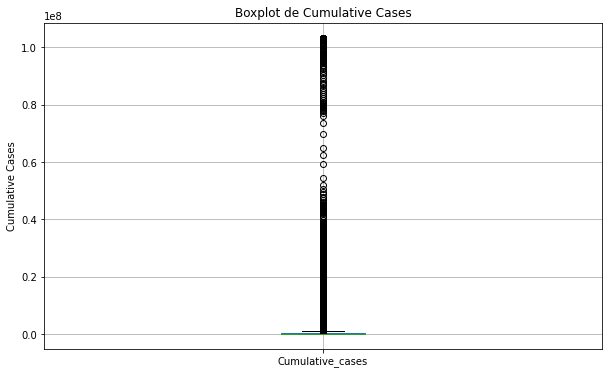

In [127]:
# Crear una figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Crear el boxplot
df_covid_limpio.boxplot(['Cumulative_cases'])

# Añadir etiquetas y título
plt.ylabel('Cumulative Cases')
plt.title('Boxplot de Cumulative Cases')

# Mostrar el gráfico
plt.show()

In [128]:
# Obtener la suma total de la columna Cumulative_deaths
suma_total = df_covid_limpio['Cumulative_cases'].sum()

suma_total

81955673772

### Visualizar la distribución de los valores en la columna Cumulative_deaths

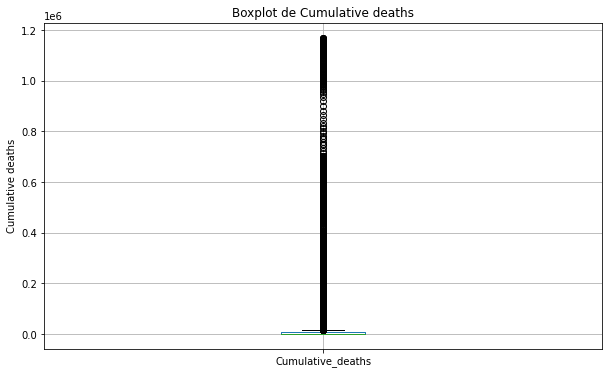

In [129]:

# Crear una figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Crear el boxplot
df_covid_limpio.boxplot(['Cumulative_deaths'])

# Añadir etiquetas y título
plt.ylabel('Cumulative deaths')
plt.title('Boxplot de Cumulative deaths')

# Mostrar el gráfico
plt.show()

In [130]:
# Obtener la suma total de la columna Cumulative_deaths
suma_total = df_covid_limpio['Cumulative_deaths'].sum()

suma_total

959537095

### Visualizar la distribución de los valores en la columna lethality_rate

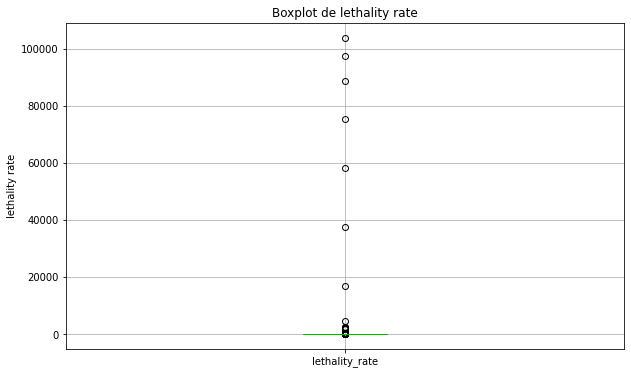

In [131]:

# Crear una figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Crear el boxplot
df_covid_limpio.boxplot(['lethality_rate'])

# Añadir etiquetas y título
plt.ylabel('lethality rate')
plt.title('Boxplot de lethality rate')

# Mostrar el gráfico
plt.show()

In [132]:
# Obtener la suma total de la columna Cumulative_deaths
# esta mal no haya esta cantidad , nos quedaremos con el 99% superior de los quantiles y el resto lo elimino
suma_total = df_covid_limpio['lethality_rate'].sum()

suma_total

582181.1545358403

In [133]:
df_covid_limpio.shape

(50907, 8)

In [159]:
# Filtrar los registros cuyo valor en lethality_rate se encuentre entre los cuantiles 0.00 y 0.99
lower_quantile = df_covid_limpio['lethality_rate'].quantile(0.00)
upper_quantile = df_covid_limpio['lethality_rate'].quantile(0.99)
df_covid_limpio = df_covid_limpio[(df_covid_limpio['lethality_rate'] >= lower_quantile) & (df_covid_limpio['lethality_rate'] <= upper_quantile)]
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.0


In [160]:
df_covid_limpio.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
count,5.039700e+04,5.039700e+04,50397.000000,5.039700e+04,50397.000000
mean,1.531940e+04,1.625598e+06,133.719507,1.894365e+04,1.418191
std,2.384356e+05,7.247214e+06,854.296987,7.868052e+04,1.604828
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00,0.000000
25%,0.000000e+00,2.835000e+03,0.000000,2.100000e+01,0.276181
50%,8.700000e+01,3.863900e+04,0.000000,4.080000e+02,0.979707
75%,1.829000e+03,4.885080e+05,18.000000,6.210000e+03,1.967580
max,4.047548e+07,1.034368e+08,47687.000000,1.170784e+06,11.915304


identificar problemas no solo de la extructura si no tambien en la clidad de los datos para poder limpiarlo y tener informacion de calidad

###  Reiniciaremos el índice del dataframe final df_covid_limpio


In [161]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51120 entries, 0 to 51119
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      51120 non-null  object 
 1   Country_code       50907 non-null  object 
 2   Country            51120 non-null  object 
 3   WHO_region         47286 non-null  object 
 4   New_cases          36698 non-null  float64
 5   Cumulative_cases   51120 non-null  int64  
 6   New_deaths         24249 non-null  float64
 7   Cumulative_deaths  51120 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB


In [163]:
# 8. Reiniciar el índice del DataFrame final
#df_covid_limpio = df_covid.reset_index(drop=True)
df_covid_limpio = df_covid_limpio.reset_index(drop=True)
df_covid_limpio.tail()





,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
50392,2023-12-31,ZW,Zimbabwe,0,266048,0,5731,2.154123
50393,2024-01-07,ZW,Zimbabwe,46,266094,3,5734,2.154878
50394,2024-01-14,ZW,Zimbabwe,85,266179,3,5737,2.155317
50395,2024-01-21,ZW,Zimbabwe,55,266234,0,5737,2.154871
50396,2024-01-28,ZW,Zimbabwe,31,266265,0,5737,2.154620


In [ ]:
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))

display(df_covid.head())

# Eliminar registros nulos en la columna Country_code
df_covid_limpio = df_covid.dropna(subset=['Country_code'])
# Eliminamos la columna WHO_region
selected_columns = ['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
df_covid_limpio = df_covid_limpio[selected_columns]

# Substituir todos los valores nulos con cero.
# Aseguramos que la lista de columnas especificadas contengan ceros en lugar de valores nulos para garantizar 
# la integridad de los datos y evitar errores en análisis posteriores.
columns_to_replace_zero = ['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']

for column in columns_to_replace_zero:
    if df_covid_limpio[column].isnull().any():
        df_covid_limpio[column] = df_covid_limpio[column].fillna(0)
#  Cambiar el formato de la columna Date_reported a datetime64[ns] que estaba como object
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])
df_covid_limpio.dtypes
# Cambiar el formato de las columnas New_cases y 'New_deaths a int64
df_covid_limpio[['New_cases', 'New_deaths']] = df_covid_limpio[['New_cases', 'New_deaths']].astype('int64')
df_covid_limpio.dtypes
# Crear la columna lethality_rate con manejo de división por cero
df_covid_limpio['lethality_rate'] = np.where(df_covid_limpio['Cumulative_cases'] != 0, 
                                       (df_covid_limpio['Cumulative_deaths'] / df_covid_limpio['Cumulative_cases']) * 100, 
                                      0)
df_covid_limpio.head()

# Filtrar los registros cuyo valor en lethality_rate se encuentre entre los cuantiles 0.00 y 0.99
lower_quantile = df_covid_limpio['lethality_rate'].quantile(0.00)
upper_quantile = df_covid_limpio['lethality_rate'].quantile(0.99)
df_covid_limpio = df_covid_limpio[(df_covid_limpio['lethality_rate'] >= lower_quantile) & (df_covid_limpio['lethality_rate'] <= upper_quantile)]
df_covid_limpio.head()

# 8. Reiniciar el índice del DataFrame final
df_covid_limpio = df_covid.reset_index(drop=True)
df_covid_limpio.tail()



---



---







## EDA Base Population United Nations




In [38]:
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

In [207]:
df_population.head()

,Index,Variant,"Region, subregion, country or area *",Notes,Location code,ISO3 Alpha-code,ISO2 Alpha-code,SDMX code**,Type,Parent code,...,"Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)","Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)","Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)","Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)","Mortality between Age 15 and 60, both sexes (deaths under age 60 per 1,000 alive at age 15)","Male Mortality between Age 15 and 60 (deaths under age 60 per 1,000 males alive at age 15)","Female Mortality between Age 15 and 60 (deaths under age 60 per 1,000 females alive at age 15)",Net Number of Migrants (thousands),"Net Migration Rate (per 1,000 population)"
69,70,Estimates,WORLD,NaN,900,NaN,NaN,1.0,World,0,...,209.694,146.21,71.916,87.268,55.799,138.207,168.929,106.291,0,0
142,143,Estimates,Sub-Saharan Africa,b,1834,NaN,NaN,202.0,SDG region,1828,...,388.622,324.278,173.83,192.276,155.259,284.876,316.977,253.162,-484.702,-0.448
214,215,Estimates,Northern Africa and Western Asia,NaN,1833,NaN,NaN,747.0,SDG region,1828,...,174.739,113.261,53.27,65.448,39.486,118.468,146.064,87.691,-124.728,-0.235
286,287,Estimates,Central and Southern Asia,NaN,1831,NaN,NaN,62.0,SDG region,1828,...,227.047,168.558,75.217,90.827,58.668,161.773,190.486,131.231,-2473.484,-1.223
358,359,Estimates,Eastern and South-Eastern Asia,NaN,1832,NaN,NaN,753.0,SDG region,1828,...,145.643,86.283,47.004,58.936,34.318,100.287,128.133,71.208,-99.778,-0.043


In [208]:
df_population.shape

(286, 65)

### Mantener en el dataframe sólo las siguientes columnas: ['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']

In [209]:
#Seleccionar las columnas especificadas
df_population_limpio = df_population[['ISO2 Alpha-code',
                                      'Total Population, as of 1 July (thousands)',
                                      'Male Population, as of 1 July (thousands)',
                                      'Female Population, as of 1 July (thousands)',
                                      'Population Density, as of 1 July (persons per square km)',
                                      'Life Expectancy at Birth, both sexes (years)']]
df_population_limpio

,ISO2 Alpha-code,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)","Population Density, as of 1 July (persons per square km)","Life Expectancy at Birth, both sexes (years)"
69,NaN,7764951.032,3906407.855,3858543.178,59.546,72.79
142,NaN,1080677.346,538158.386,542518.959,49.425,60.725
214,NaN,530149.56,273104.233,257045.327,42.485,73.392
286,NaN,2021559.651,1033583.865,987975.786,195.683,70.615
358,NaN,2324282.002,1176368.32,1147913.681,143.117,77.013
...,...,...,...,...,...,...
20305,WS,211.905,108.147,103.759,74.878,72.157
20377,TK,1.752,0.879,0.874,146,75.076
20449,TO,104.951,51.994,52.956,161.462,70.871
20521,TV,10.956,5.654,5.301,365.2,64.278


### Renombrar las columnas 

In [210]:
# Renombrar las columnas
df_population_limpio = df_population_limpio.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
})
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
69,NaN,7764951.032,3906407.855,3858543.178,59.546,72.79
142,NaN,1080677.346,538158.386,542518.959,49.425,60.725
214,NaN,530149.56,273104.233,257045.327,42.485,73.392
286,NaN,2021559.651,1033583.865,987975.786,195.683,70.615
358,NaN,2324282.002,1176368.32,1147913.681,143.117,77.013


### Eliminar todos los registros nulos.


In [211]:
df_population_limpio.isnull().sum()

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

In [212]:
# Eliminar registros nulos
df_population_limpio = df_population_limpio.dropna()
df_population_limpio.isnull().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

### Substituir el formato actual de las columnas
Estan en formato object pasar a entero

In [213]:
df_population_limpio.dtypes

Country_code          object
Total_Population      object
Male_Population       object
Female_Population     object
Population_Density    object
Life_Expectancy       object
dtype: object

In [214]:
# Cambiar el formato de las columnas a int64
columnas_a_convertir = ['Total_Population', 'Male_Population', 'Female_Population']
df_population_limpio[columnas_a_convertir] = df_population_limpio[columnas_a_convertir].astype('int64')


ValueError: invalid literal for int() with base 10: '...'

In [215]:
## ValueError: invalid literal for int() with base 10: '...'

In [216]:
# Filtrar las filas que contienen '...' en cualquier columna
filas_punto = df_population_limpio[df_population_limpio.eq('...').any(axis=1)]

filas_punto


,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
12817,VA,0.528,...,...,1200,...


In [217]:
# Cual es el paiz que no tiene estos datos? por que? el vaticano

 Reemplazar '...' con 0 en las columnas problemáticas o eliminar(elimino porque es una sola fila)

In [218]:
## Reemplazar '...' con 0 en las columnas con puntitos
#df_population_limpio['Male_Population'] = df_population_limpio['Male_Population'].replace('...', 0)
#df_population_limpio['Female_Population'] = df_population_limpio['Female_Population'].replace('...', 0)
#df_population_limpio['Life_Expectancy'] = df_population_limpio['Life_Expectancy'].replace('...', 0)

## Convertir columnas al formato int64
#columns_to_convert_to_int64 = ['Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
#df_population_limpio[columns_to_convert_to_int64] = df_population_limpio[columns_to_convert_to_int64].astype('int64')



##########################################################################
## Eliminar filas con valores '...' en las columnas Male_Population y Female_Population
df_population_limpio = df_population_limpio[df_population_limpio['Male_Population'] != '...']
df_population_limpio = df_population_limpio[df_population_limpio['Female_Population'] != '...']
df_population_limpio = df_population_limpio[df_population_limpio['Life_Expectancy'] != '...']

## Convertir columnas al formato int64
columns_to_convert_to_int64 = ['Total_Population', 'Male_Population', 'Female_Population', 'Population_Density', 'Life_Expectancy']
df_population_limpio[columns_to_convert_to_int64] = df_population_limpio[columns_to_convert_to_int64].astype('int64')

df_population_limpio.dtypes

Country_code          object
Total_Population       int64
Male_Population        int64
Female_Population      int64
Population_Density     int64
Life_Expectancy        int64
dtype: object

In [219]:
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874,5894,5980,457,62
1873,KM,790,397,393,425,64
1945,DJ,1073,533,540,46,63
2017,ER,3498,1724,1773,28,67
2089,ET,114120,57375,56745,114,65


### Multiplicar por 1000 el valor actual de las siguientes columnas 'Total_Population','Male_Population','Female_Population' y sobreescribirlas.



In [220]:
df_population_limpio.describe()

,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
count,2.350000e+02,235.000000,235.000000,235.000000,235.000000
mean,3.303141e+04,16617.472340,16413.451064,458.536170,73.008511
std,1.344878e+05,68891.309035,65609.335961,2222.189836,7.368210
min,1.000000e+00,0.000000,0.000000,0.000000,52.000000
25%,3.995000e+02,194.000000,210.500000,38.000000,68.000000
50%,5.453000e+03,2738.000000,2767.000000,95.000000,75.000000
75%,2.075900e+04,10409.000000,10349.500000,239.500000,79.000000
max,1.421864e+06,726781.000000,695082.000000,24855.000000,86.000000


In [221]:
df_population_limpio.isnull().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [222]:
## Multiplicar por 1000 las columnas 'Total_Population', 'Male_Population', 'Female_Population'
#columns_to_multiply_by_1000 = ['Total_Population', 'Male_Population', 'Female_Population']
#df_population[columns_to_multiply_by_1000] = df_population[columns_to_multiply_by_1000] * 1000
#df_population.head()

## Multiplicar por 1000 las columnas especificadas
columnas_a_multiplicar = ['Total_Population', 'Male_Population', 'Female_Population']
df_population_limpio[columnas_a_multiplicar] *= 1000
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874000,5894000,5980000,457,62
1873,KM,790000,397000,393000,425,64
1945,DJ,1073000,533000,540000,46,63
2017,ER,3498000,1724000,1773000,28,67
2089,ET,114120000,57375000,56745000,114,65


In [223]:
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874000,5894000,5980000,457,62
1873,KM,790000,397000,393000,425,64
1945,DJ,1073000,533000,540000,46,63
2017,ER,3498000,1724000,1773000,28,67
2089,ET,114120000,57375000,56745000,114,65


###  Eliminar todos los registros nulos.

In [224]:
df_population_limpio.isnull().sum()

Country_code          0
Total_Population      0
Male_Population       0
Female_Population     0
Population_Density    0
Life_Expectancy       0
dtype: int64

In [225]:
# Eliminar los registros nulos después de las conversiones
df_population_limpio = df_population_limpio.dropna()

In [226]:
# Ahora los valores en estas columnas están en unidades individuales en lugar de miles
df_population_limpio.describe()


,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
count,2.350000e+02,2.350000e+02,2.350000e+02,235.000000,235.000000
mean,3.303141e+07,1.661747e+07,1.641345e+07,458.536170,73.008511
std,1.344878e+08,6.889131e+07,6.560934e+07,2222.189836,7.368210
min,1.000000e+03,0.000000e+00,0.000000e+00,0.000000,52.000000
25%,3.995000e+05,1.940000e+05,2.105000e+05,38.000000,68.000000
50%,5.453000e+06,2.738000e+06,2.767000e+06,95.000000,75.000000
75%,2.075900e+07,1.040900e+07,1.034950e+07,239.500000,79.000000
max,1.421864e+09,7.267810e+08,6.950820e+08,24855.000000,86.000000


In [227]:

# Calcula los límites superior e inferior para cada columna
Q1 = df_population_limpio.quantile(0.25)
Q3 = df_population_limpio.quantile(0.75)
IQR = Q3 - Q1

# Identifica los valores atípicos en cada columna
outliers = ((df_population_limpio < (Q1 - 1.5 * IQR)) | (df_population_limpio > (Q3 + 1.5 * IQR)))

# Cuenta la cantidad de valores atípicos por columna
outliers_count = outliers.sum()

outliers_count


/home/vagrant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys


Country_code           0
Female_Population     28
Life_Expectancy        0
Male_Population       27
Population_Density    23
Total_Population      27
dtype: int64

In [228]:
# Calcula la cantidad de valores atípicos por fila
outliers_per_row = outliers.sum(axis=1)

# Cuenta la cantidad total de filas con al menos un valor atípico
total_rows_with_outliers = (outliers_per_row > 0).sum()

# Muestra el resultado
print(f"Total de filas con al menos un valor atípico: {total_rows_with_outliers}")


Total de filas con al menos un valor atípico: 50


In [229]:
df_population_limpio.shape

(235, 6)

In [230]:
# si elimino los valores considerado atipicos pierdo 50 filas de 235
# 235-50= 185

In [231]:
# Filtra el DataFrame original para obtener las filas con valores atípicos
rows_with_outliers = df_population_limpio[outliers.any(axis=1)]

# Muestra las filas con valores atípicos
rows_with_outliers


,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
2089,ET,114120000,57375000,56745000,114,65
2161,KE,50951000,25272000,25679000,87,62
2377,MU,1296000,640000,655000,638,75
2449,YT,294000,139000,154000,785,77
3025,TZ,59872000,29563000,30309000,67,66
3673,CD,89906000,44600000,45306000,39,60
4105,EG,105618000,53429000,52189000,106,71
4897,ZA,58087000,28207000,29879000,47,66
5905,NG,203304000,102680000,100623000,223,52
6841,CN,1421864000,726781000,695082000,148,77


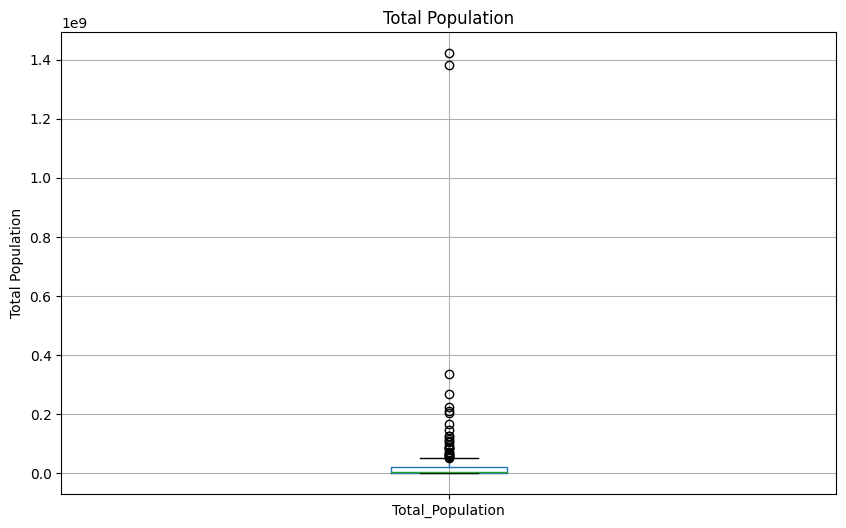

In [232]:
# Crear una figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Crear el boxplot. Total_Population      27
df_population_limpio.boxplot(['Total_Population'])

# Añadir etiquetas y título
plt.ylabel('Total Population')
plt.title('Total Population')

# Mostrar el gráfico
plt.show()

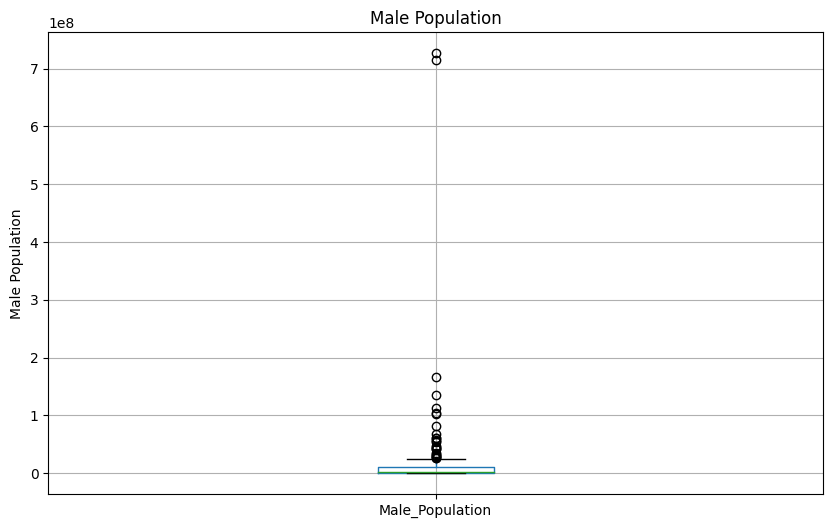

In [233]:
# Crear una figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Crear el boxplot. Male_Population       27
df_population_limpio.boxplot(['Male_Population'])

# Añadir etiquetas y título
plt.ylabel('Male Population')
plt.title('Male Population')

# Mostrar el gráfico
plt.show()

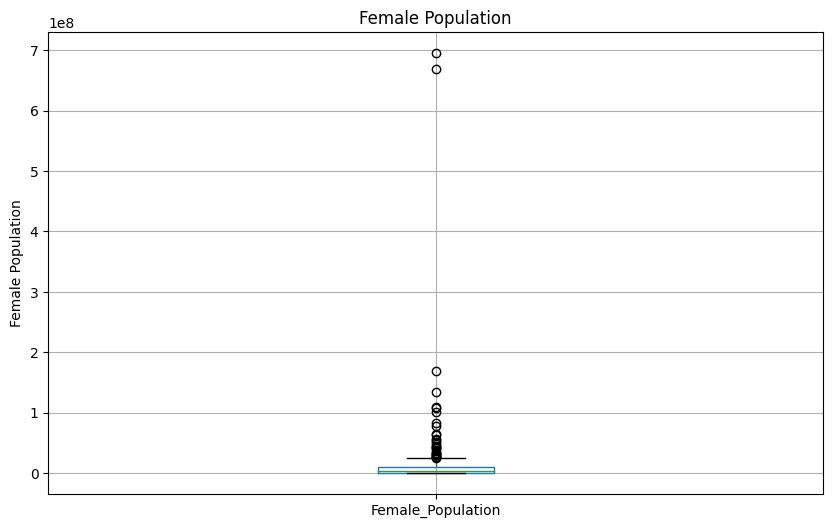

In [234]:
# Crear una figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Crear el boxplot. Female_Population     28
df_population_limpio.boxplot(['Female_Population'])

# Añadir etiquetas y título
plt.ylabel('Female Population')
plt.title('Female Population')

# Mostrar el gráfico
plt.show()

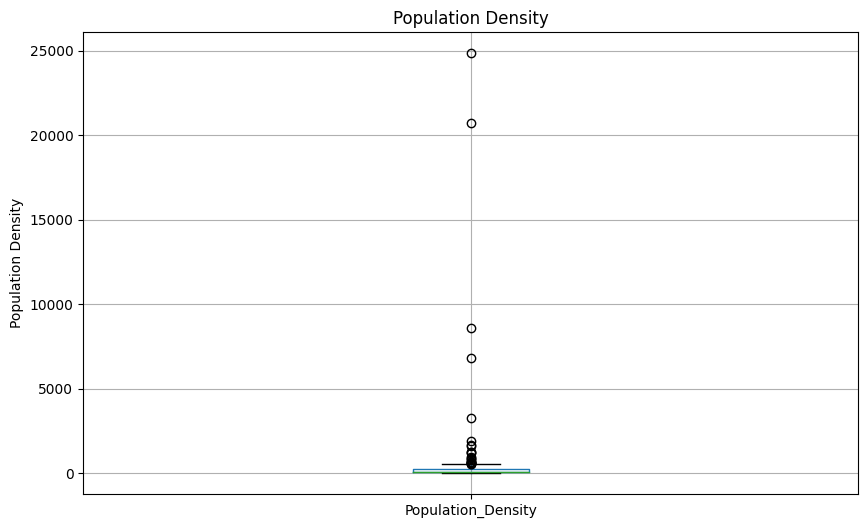

In [235]:
# Crear una figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Crear el boxplot. Population_Density    23
df_population_limpio.boxplot(['Population_Density'])

# Añadir etiquetas y título
plt.ylabel('Population Density')
plt.title('Population Density')

# Mostrar el gráfico
plt.show()

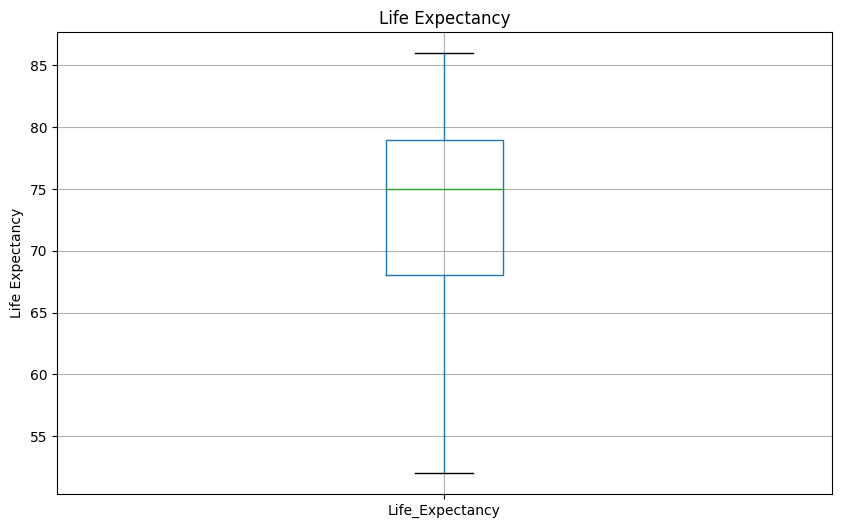

In [236]:
# Crear una figura con un tamaño específico
plt.figure(figsize=(10, 6))

# Crear el boxplot. no tiene valores actipicos
df_population_limpio.boxplot(['Life_Expectancy'])

# Añadir etiquetas y título
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy')

# Mostrar el gráfico
plt.show()

In [237]:
# Define las columnas con valores atípicos
columnas_atipicas = ['Female_Population', 'Male_Population', 'Population_Density', 'Total_Population']

# Filtra los registros cuyo valor en las columnas con valores atípicos se encuentre entre los cuantiles 0.00 y 0.99
for columna in columnas_atipicas:
    lower_quantile = df_population_limpio[columna].quantile(0.00)
    upper_quantile = df_population_limpio[columna].quantile(0.99)
    df_population_limpio = df_population_limpio[(df_population_limpio[columna] >= lower_quantile) & (df_population_limpio[columna] <= upper_quantile)]

df_population_limpio


,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
1801,BI,11874000,5894000,5980000,457,62
1873,KM,790000,397000,393000,425,64
1945,DJ,1073000,533000,540000,46,63
2017,ER,3498000,1724000,1773000,28,67
2089,ET,114120000,57375000,56745000,114,65
...,...,...,...,...,...,...
20305,WS,211000,108000,103000,74,72
20377,TK,1000,0,0,146,75
20449,TO,104000,51000,52000,161,70
20521,TV,10000,5000,5000,365,64


- si elimino columnas con valores atípicos se encuentre entre los cuantiles 0.00 y 0.99 esta solo elimimino 12 en vez de 50 filas

In [238]:
df_population_limpio.describe()

,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
count,2.230000e+02,2.230000e+02,2.230000e+02,223.000000,223.000000
mean,1.523453e+07,7.575933e+06,7.658117e+06,228.551570,72.959641
std,2.448932e+07,1.215395e+07,1.234550e+07,560.029589,7.274736
min,1.000000e+03,0.000000e+00,0.000000e+00,0.000000,53.000000
25%,3.805000e+05,1.815000e+05,1.965000e+05,38.000000,68.000000
50%,4.985000e+06,2.605000e+06,2.507000e+06,91.000000,75.000000
75%,1.856700e+07,9.035500e+06,9.451500e+06,232.000000,79.000000
max,1.257910e+08,6.118700e+07,6.463300e+07,6820.000000,85.000000


In [239]:
Life_Expectancy. Aquí están los valores específicos:

Mínimo (min): 53 años
Cuartil 1 (25%): 68 años
Mediana (50%): 75 años
Cuartil 3 (75%): 79 años
Máximo (max): 85 años
Esto significa que, después de eliminar algunos valores atípicos, la esperanza de vida varía desde un mínimo de 53 años hasta un máximo de 85 años. El 25% de los países tienen una esperanza de vida de 68 años o menos, el 50% tienen una esperanza de vida de 75 años o menos, y el 75% tienen una esperanza de vida de 79 años o menos.

Estos valores proporcionan un resumen más ajustado de la distribución de la esperanza de vida en los países representados en el DataFrame después de realizar la limpieza de datos.

SyntaxError: invalid syntax (<ipython-input-239-fa1e8c53c50b>, line 1)

In [200]:
 las estadísticas descriptivas actualizadas después de eliminar algunos valores atípicos para las columnas Total_Population, Male_Population, Female_Population y Population_Density en el DataFrame df_population_limpio:

Total_Population:

Mínimo (min): 1,000 personas
Cuartil 1 (25%): 380,500 personas
Mediana (50%): 4,985,000 personas
Cuartil 3 (75%): 18,567,000 personas
Máximo (max): 1,257,910,000 personas
Male_Population:

Mínimo (min): 0 personas (Después de multiplicar por 1000)
Cuartil 1 (25%): 181,500 personas
Mediana (50%): 2,605,000 personas
Cuartil 3 (75%): 9,035,500 personas
Máximo (max): 61,187,000 personas
Female_Population:

Mínimo (min): 0 personas (Después de multiplicar por 1000)
Cuartil 1 (25%): 196,500 personas
Mediana (50%): 2,507,000 personas
Cuartil 3 (75%): 9,451,500 personas
Máximo (max): 64,633,000 personas
Population_Density:

Mínimo (min): 0 personas por kilómetro cuadrado
Cuartil 1 (25%): 38 personas por kilómetro cuadrado
Mediana (50%): 91 personas por kilómetro cuadrado
Cuartil 3 (75%): 232 personas por kilómetro cuadrado
Máximo (max): 6,820 personas por kilómetro cuadrado
Estos valores proporcionan una descripción actualizada y más ajustada de la distribución de las poblaciones total, masculina y femenina, así como de la densidad de población después de la limpieza de datos.

SyntaxError: invalid syntax (<ipython-input-200-00f4df7c690e>, line 1)

### Reiniciar el índice del dataframe final df_population_limpio


In [240]:
# Reiniciar el índice
df_population_limpio = df_population_limpio.reset_index(drop=True)
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,BI,11874000,5894000,5980000,457,62
1,KM,790000,397000,393000,425,64
2,DJ,1073000,533000,540000,46,63
3,ER,3498000,1724000,1773000,28,67
4,ET,114120000,57375000,56745000,114,65


In [241]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        223 non-null    object
 1   Total_Population    223 non-null    int64 
 2   Male_Population     223 non-null    int64 
 3   Female_Population   223 non-null    int64 
 4   Population_Density  223 non-null    int64 
 5   Life_Expectancy     223 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 10.6+ KB


### **Preguntas**

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Existe otro insight que puedas proporcionar?

## 3. Pregunta1

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

In [164]:
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.0
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.0
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.0
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.0
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.0


In [367]:
# Renombrar los países en la columna Country
df_covid_limpio['Country'].replace({'United States of America': 'USA',
                                    'Republic of Korea': 'South Korea',
                                    'United Kingdom of Great Britain and Northern Ireland': 'UK'}, inplace=True)


df_covid_limpio


,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AF,Afghanistan,0,0,0,0,0.000000
1,2020-01-12,AF,Afghanistan,0,0,0,0,0.000000
2,2020-01-19,AF,Afghanistan,0,0,0,0,0.000000
3,2020-01-26,AF,Afghanistan,0,0,0,0,0.000000
4,2020-02-02,AF,Afghanistan,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...
50392,2023-12-31,ZW,Zimbabwe,0,266048,0,5731,2.154123
50393,2024-01-07,ZW,Zimbabwe,46,266094,3,5734,2.154878
50394,2024-01-14,ZW,Zimbabwe,85,266179,3,5737,2.155317
50395,2024-01-21,ZW,Zimbabwe,55,266234,0,5737,2.154871


In [165]:
# Agrupa por país y obtén el máximo valor de Cumulative_cases
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)

# Selecciona los 10 primeros países e inclir argentina
top_10_paises = total_por_pais.nlargest(10).append(pd.Series(total_por_pais.loc['Argentina'], index=['Argentina']))

# Retira los 10 países identificados en top_10_paises y suma los valores restantes
otros = total_por_pais.drop(top_10_paises.index).sum()

# Crea un nuevo registro 'Otros' en top_10_paises con el valor de la variable otros
top_10_paises['Otros'] = otros


# Worldwide Distribution

## Agrupar por país y obtener el máximo valor de la columna Cumulative_cases, luego lo ordenamos descendentemente y guardamos el resultado en total_por_pais.

In [368]:
# Agrupa por país y obtén el máximo valor de Cumulative_cases
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)
total_por_pais

Country
USA                                      103436829
China                                     99327754
India                                     45025076
France                                    38997490
Germany                                   38437756
                                           ...    
Fesco                                            4
Ickiribati                                       2
Yemen                                            1
Democratic People's Republic of Korea            0
Turkmenistan                                     0
Name: Cumulative_cases, Length: 239, dtype: int64

## Seleccionamos los 10 primeros países y guardamos el resultado en top_10_paises.

In [369]:
# Selecciona los 10 primeros países
#top_10_paises = total_por_pais.nlargest(10)
#top_10_paises

# Seleccionar los 10 primeros países e incluir Argentina
top_10_paises = total_por_pais.nlargest(10).append(pd.Series(total_por_pais.loc['Argentina'], index=['Argentina']))
top_10_paises

USA            103436829
China           99327754
India           45025076
France          38997490
Germany         38437756
Brazil          37519960
South Korea     34571873
Japan           33803572
Italy           26699442
UK              24892903
Argentina       10094643
dtype: int64

### Retiro de la variable total_por_pais los 10 países identificados en top_10_paises, así tendré una Series con todos los demás países fuera del top 10, sumo todos los valores restantes de total_por_pais y lo almaceno en la variable otros

In [370]:
# Retira los 10 países identificados en top_10_paises y suma los valores restantes
otros = total_por_pais.drop(top_10_paises.index).sum()
otros

281511841

## Creo un nuevo registro llamado Otros en top_10_paises con el valor de la variable otros

In [371]:
# Crea un nuevo registro 'Otros' en top_10_paises con el valor de la variable otros
top_10_paises['Otros'] = otros
top_10_paises

USA            103436829
China           99327754
India           45025076
France          38997490
Germany         38437756
Brazil          37519960
South Korea     34571873
Japan           33803572
Italy           26699442
UK              24892903
Argentina       10094643
Otros          281511841
dtype: int64

# Case Progression by Country

## Agrupar por país y obtener el máximo valor de la columna Cumulative_cases, luego lo ordenamos descendentemente y guardamos el resultado en total_por_pais

In [372]:
# Agrupa por país y obtén el máximo valor de Cumulative_cases
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)


total_por_pais.head(10)

Country
USA            103436829
China           99327754
India           45025076
France          38997490
Germany         38437756
Brazil          37519960
South Korea     34571873
Japan           33803572
Italy           26699442
UK              24892903
Name: Cumulative_cases, dtype: int64

## Seleccionamos los 5 primeros países y guardamos el resultado en top_5_paises.

In [373]:
# Selecciona los 5 primeros países
top_5_paises = total_por_pais.nlargest(5).index.tolist()  # Obtener la lista de los 5 primeros países
top_5_paises.append('Argentina')

# Cambiar el nombre de la columna 'United States of America' por 'USA'
top_5_paises = ['USA' if country == 'United States of America' else country for country in top_5_paises]

top_5_paises


['USA', 'China', 'India', 'France', 'Germany', 'Argentina']

In [179]:
## Pais elegido Argentina

# Agrupar por pais y elegir el maximo
#total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max()

# Ordenar descendentemente
#total_por_pais = total_por_pais.sort_values(ascending=False)

# Seleccionar los 10 primeros países e incluir Colombia
#top_10_paises = total_por_pais.head(10).append(pd.Series(total_por_pais.loc['Argentina'], index=['Argentina']))

# Retirar los 10 primeros países de total_por_pais
total_por_pais_sin_top_10 = total_por_pais.drop(top_10_paises.index)

# Sumar todos los valores restantes
#otros = total_por_pais_sin_top_10.sum()

# Agregar un nuevo registro llamado 'Otros' en top_10_paises
top_10_paises_con_otros = top_10_paises.append(pd.Series([otros], index=['Otros']))



# Casos acumulados del top 5 más Colombia
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)
#top_5_paises = total_por_pais.nlargest(5).index.tolist()  # Obtener la lista de los 5 primeros países
#top_5_paises.append('Argentina')  # Agregar Colombia a la lista
#df_covid_limpio_reset = df_covid_limpio.reset_index()
#df_top_5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises)]
total_acumulado_top_5 = df_top_5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)


## Reiniciamos el índice de df_covid_limpio y lo almacenamos en df_covid_limpio_reset.
De df_covid_limpio_reset mantengo sólo los registros cuyo país esté dentro de top_5_paises.

In [374]:

# Reinicia el índice de df_covid_limpio y mantén solo los registros cuyo país esté dentro de top_5_paises
df_covid_limpio_reset = df_covid_limpio.reset_index()
df_top_5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises)]
df_top_5

,index,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
1694,1694,2020-01-05,AR,Argentina,0,0,0,0,0.000000
1695,1695,2020-01-12,AR,Argentina,0,0,0,0,0.000000
1696,1696,2020-01-19,AR,Argentina,0,0,0,0,0.000000
1697,1697,2020-01-26,AR,Argentina,0,0,0,0,0.000000
1698,1698,2020-02-02,AR,Argentina,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...,...
48467,48467,2023-12-31,US,USA,0,103436829,2079,1163811,1.125142
48468,48468,2024-01-07,US,USA,0,103436829,2263,1166074,1.127330
48469,48469,2024-01-14,US,USA,0,103436829,2132,1168206,1.129391
48470,48470,2024-01-21,US,USA,0,103436829,1644,1169850,1.130980


## Finalmente, realizamos un pivot sobre df_top_5 para tener los países como índices y las fechas como columnas, y almacenamos el resultado en total_acumulado_top_5.

In [375]:
# Realiza un pivot sobre df_top_5
total_acumulado_top_5 = df_top_5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)
total_acumulado_top_5

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21,2024-01-28
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,10073701.0,10074309.0,10074775.0,10075395.0,10076004.0,10076858.0,10078988.0,10082760.0,10088516.0,10094643.0
China,1.0,45.0,125.0,1985.0,14411.0,37251.0,68584.0,77042.0,79968.0,80859.0,...,99320425.0,99320845.0,99321242.0,99321637.0,99322142.0,99322727.0,99323756.0,99325108.0,99326423.0,99327754.0
France,0.0,0.0,0.0,3.0,6.0,12.0,12.0,16.0,16.0,16.0,...,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,170.0,1075.0,...,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0
India,0.0,0.0,0.0,0.0,2.0,7.0,7.0,7.0,7.0,39.0,...,45001764.0,45002179.0,45003055.0,45004816.0,45008620.0,45013172.0,45018134.0,45021758.0,45023751.0,45025076.0
USA,0.0,0.0,0.0,7.0,9.0,20.0,24.0,40.0,73.0,464.0,...,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0,103436829.0


## Visualización

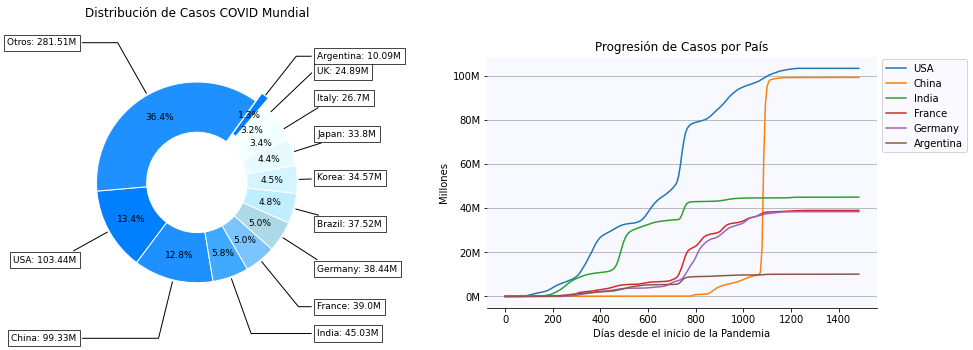

In [412]:
# Crear una serie con nombres cortos de países
serie_nombres_cortos = pd.Series(casos.values, index=[nombres_cortos[pais] for pais in paises])

# Unificar columnas y convertir a millones con 2 decimales y la letra "M"
#df_top_en_millones = pd.Series(serie_nombres_cortos.index + ': ' + (serie_nombres_cortos / 1000000).round(2).astype(str) + 'M', name='Cumulative_cases')

# Configuración básica de los gráficos
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
#destacar = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1, 0)
#colores = ['#007FFF', '#1E90FF', '#3EA9FF', '#7AC5FF', '#ADD8E6', '#BFEFFF', '#D4F4FF', '#E6FAFF', '#F0FFFF', '#F5FFFF']
#colores = ['#007FFF', '#1E90FF', '#3EA9FF', '#7AC5FF', '#ADD8E6', '#BFEFFF', '#D4F4FF', '#E6FAFF', '#F0FFFF', '#F5FFFF']

colores = ['#007FFF', '#1E90FF', '#3EA9FF', '#7AC5FF', '#ADD8E6', '#BFEFFF', '#D4F4FF', '#E6FAFF', '#F0FFFF', '#F5FFFF']



# Gráfico de Donas para el top 10
#wedges_top10, texts_top10, autotexts_top10 = axs[0].pie(serie_nombres_cortos, explode=destacar, colors=colores, autopct='%1.1f%%',
#                                                       textprops={'fontsize': 9, 'bbox': dict(facecolor="white", edgecolor="black", linewidth=0, alpha=0.3)}, pctdistance=0.75,
#                                                       startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'))
# bbox=None, eliminas el rectángulo que rodea el porcentaje
wedges_top10, texts_top10, autotexts_top10 = axs[0].pie(serie_nombres_cortos, explode=destacar, colors=colores, autopct='%1.1f%%',
                                                       textprops={'fontsize': 9, 'bbox': None}, pctdistance=0.75,
                                                       startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'))

#bbox_paises = dict(boxstyle="square,pad=0.4", fc="w", ec="k", lw=0.72)
#lines = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_paises, zorder=0, va="center")
#for i, p in enumerate(wedges_top10):
#    ang = (p.theta2 - p.theta1)/2. + p.theta1
#    y = np.sin(np.deg2rad(ang))
#    x = np.cos(np.deg2rad(ang))
#    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
#    connectionstyle = f"angle,angleA=0,angleB={ang}"
#    lines["arrowprops"].update({"connectionstyle": connectionstyle})
#    axs[0].annotate(df_top_en_millones[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.4*y),
#                 horizontalalignment=horizontalalignment, **lines, fontsize=9)

bbox_paises = dict(boxstyle="square,pad=0.4", fc="w", ec="k", lw=0.72)
lines = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_paises, zorder=0, va="center")

for i, p in enumerate(wedges_top10):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    lines["arrowprops"].update({"connectionstyle": connectionstyle})
    axs[0].annotate(df_top_en_millones[i], xy=(x, y), xytext=(1.2*np.sign(x), 1.6*y),
                 horizontalalignment=horizontalalignment, **lines, fontsize=9)

axs[0].set_title('Distribución de Casos COVID Mundial', pad=40)

# ---------------------------------
# Gráfico de Líneas para el top 5

for pais in top_5_paises:
    days_since_start = (total_acumulado_top_5.columns - total_acumulado_top_5.columns[0]).days
    axs[1].plot(days_since_start, total_acumulado_top_5.loc[pais], label=pais)

# Formatear el eje Y con numeros entreos y 'M' para millones
def millones(x, _):
  rounded_value = round(x*0.000001)
  return f'{int(rounded_value):,}M'

axs[1].yaxis.set_major_formatter(FuncFormatter(millones))
axs[1].grid(axis='y', linestyle='-', linewidth=0.5, color='gray')
axs[1].set_title('Progresión de Casos por País')
axs[1].set_xlabel('Días desde el inicio de la Pandemia')
axs[1].set_ylabel('Millones')
axs[1].legend(loc='lower left', bbox_to_anchor=(1, 0.6))

# Ajustes finales y visualización
plt.tight_layout()
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)


In [ ]:
### **Preguntas**

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Existe otro insight que puedas proporcionar?

### 4. **Preguntas** 2

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?


## Daily New Cases

### Agrupar por país y fecha para obtener el valor de la columna Cumulative_cases, luego guardamos el resultado en grouped_df.

In [188]:
grouped_df = df_covid_limpio.groupby(['Country', 'Date_reported'])['Cumulative_cases'].sum().unstack()
grouped_df.head()

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21,2024-01-28
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,228975.0,229263.0,229367.0,229703.0,230075.0,230375.0,230642.0,230875.0,231072.0,231329.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,334408.0,334450.0,334506.0,334555.0,334596.0,334596.0,334653.0,334752.0,334818.0,334863.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,...,271991.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0


### Reiniciamos el índice de grouped_df.

In [189]:
grouped_df = grouped_df.reset_index()
grouped_df

Date_reported,Country,2020-01-05 00:00:00,2020-01-12 00:00:00,2020-01-19 00:00:00,2020-01-26 00:00:00,2020-02-02 00:00:00,2020-02-09 00:00:00,2020-02-16 00:00:00,2020-02-23 00:00:00,2020-03-01 00:00:00,...,2023-11-26 00:00:00,2023-12-03 00:00:00,2023-12-10 00:00:00,2023-12-17 00:00:00,2023-12-24 00:00:00,2023-12-31 00:00:00,2024-01-07 00:00:00,2024-01-14 00:00:00,2024-01-21 00:00:00,2024-01-28 00:00:00
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,228975.0,229263.0,229367.0,229703.0,230075.0,230375.0,230642.0,230875.0,231072.0,231329.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,334408.0,334450.0,334506.0,334555.0,334596.0,334596.0,334653.0,334752.0,334818.0,334863.0
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,271991.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0
3,American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0
4,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Wallis and Futuna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0
235,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,349302.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0
237,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,265975.0,265975.0,265975.0,266025.0,266048.0,266048.0,266094.0,266179.0,266234.0,266265.0


### Indicamos que el índice de grouped_df sea la columna Country

In [190]:
grouped_df = grouped_df.set_index('Country')
grouped_df

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21,2024-01-28
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,228975.0,229263.0,229367.0,229703.0,230075.0,230375.0,230642.0,230875.0,231072.0,231329.0
Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,334408.0,334450.0,334506.0,334555.0,334596.0,334596.0,334653.0,334752.0,334818.0,334863.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,19.0,...,271991.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0,272010.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0,8359.0
Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0,48015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0,3550.0
Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zambia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,349302.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0,349304.0


### Filtramos y dejamos en grouped_df sólo los registros del país que estamos analizando.

In [191]:
grouped_df = grouped_df.loc[['Argentina']]
grouped_df

Date_reported,2020-01-05,2020-01-12,2020-01-19,2020-01-26,2020-02-02,2020-02-09,2020-02-16,2020-02-23,2020-03-01,2020-03-08,...,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14,2024-01-21,2024-01-28
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,10073701.0,10074309.0,10074775.0,10075395.0,10076004.0,10076858.0,10078988.0,10082760.0,10088516.0,10094643.0


In [192]:
#grouped_df2 = grouped_df.loc[['Argentina']]

In [193]:
#grouped_df2

### Creo una variable fechas conteniendo todas las columnas de grouped_df, que son las fechas reportadas en el país.

In [194]:
fechas = grouped_df.columns
fechas

Index([2020-01-05 00:00:00, 2020-01-12 00:00:00, 2020-01-19 00:00:00,
       2020-01-26 00:00:00, 2020-02-02 00:00:00, 2020-02-09 00:00:00,
       2020-02-16 00:00:00, 2020-02-23 00:00:00, 2020-03-01 00:00:00,
       2020-03-08 00:00:00,
       ...
       2023-11-26 00:00:00, 2023-12-03 00:00:00, 2023-12-10 00:00:00,
       2023-12-17 00:00:00, 2023-12-24 00:00:00, 2023-12-31 00:00:00,
       2024-01-07 00:00:00, 2024-01-14 00:00:00, 2024-01-21 00:00:00,
       2024-01-28 00:00:00],
      dtype='object', name='Date_reported', length=213)

## Utilizando la variable fechas calcular la diferencia de valores entre la columna anterior y columna actual y reemplazar el valor de la columna actual por la diferencia calculada, realizaremos esto para todas las fechas, guardaremos el resultado en new_cases.

In [195]:
new_cases = grouped_df[fechas].diff(axis=1).fillna(grouped_df[fechas]).sum(axis=0)
new_cases.head

<bound method NDFrame.head of Date_reported
2020-01-05       0.0
2020-01-12       0.0
2020-01-19       0.0
2020-01-26       0.0
2020-02-02       0.0
               ...  
2023-12-31     854.0
2024-01-07    2130.0
2024-01-14    3772.0
2024-01-21    5756.0
2024-01-28    6127.0
Length: 213, dtype: float64>

### Finalmente, retiraremos los registros de new_cases con valores negativos(los 0, negativo no vi)

In [196]:
new_cases = new_cases[new_cases > 0]
new_cases

Date_reported
2020-03-08      22.0
2020-03-15     109.0
2020-03-22     405.0
2020-03-29     746.0
2020-04-05     791.0
               ...  
2023-12-31     854.0
2024-01-07    2130.0
2024-01-14    3772.0
2024-01-21    5756.0
2024-01-28    6127.0
Length: 193, dtype: float64

## Visualización

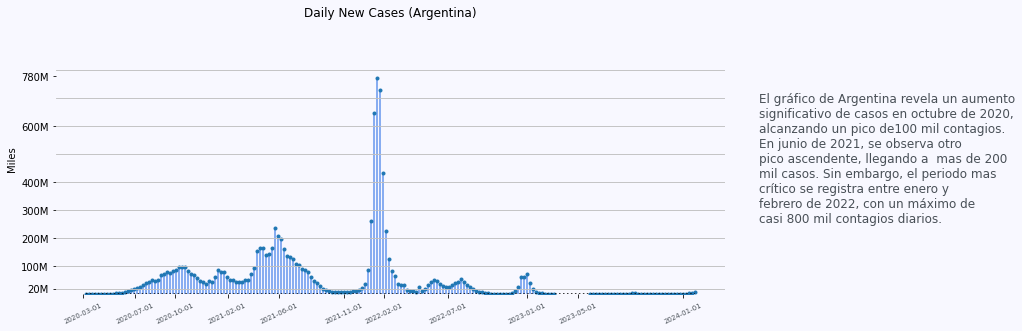

In [267]:
# Argentina
plt.rcParams["axes.facecolor"] = "#F8F8FF"
fig, ax = plt.subplots(figsize=(12, 5), facecolor='#F8F8FF')
ax.stem(new_cases.index, new_cases.values/1e3, basefmt='k:', markerfmt='.', linefmt='#6495ED')

# Ajustar automáticamente los valores del eje y basados en los datos
max_y_value = new_cases.values.max() / 1e3
plt.yticks(np.arange(0, max_y_value + 100, 100))  

plt.ylabel('Miles')
plt.yticks(y_values_to_highlight, [str(value) + 'M' for value in y_values_to_highlight]) 
plt.xticks(['2020-03','2024-01','2022-07','2022-02','2021-06','2020-10','2021-11','2021-02','2020-07','2023-01','2023-05'],rotation =25,fontsize=7, color='#495057')
plt.title('Daily New Cases (Argentina)')

# Agregar conclusion a la derecha del gráfico
conclusion_text = ("El gráfico de Argentina revela un aumento\n"
                   "significativo de casos en octubre de 2020,\n"
                   "alcanzando un pico de100 mil contagios.\n"
                   "En junio de 2021, se observa otro\n"
                   "pico ascendente, llegando a  mas de 200\n"
                   "mil casos. Sin embargo, el periodo mas\n" 
                   "crítico se registra entre enero y\n"
                   "febrero de 2022, con un máximo de\n" 
                   "casi 800 mil contagios diarios.")

# Para colocar el texto fuera del gráfico, ajustamos las coordenadas y utilizamos transform=fig.transFigure
fig.text(1.05, 0.5, conclusion_text, fontsize=12, color='#495057', va='center', ha='left', transform=ax.transAxes)


plt.ylim(0, max_y_value + 200)  # Ajuste manual de los límites del eje y

# Agregar líneas verticales en puntos específicos del eje y
for y_value in [20, 100, 200, 300, 400, 500, 600, 700, 800]:
    plt.axhline(y=y_value, color='silver', linestyle='-', linewidth=0.9)

# Eliminar los bordes del rectángulo (los ejes)
for spine in ax.spines.values():
    spine.set_visible(False)

plt.show()
